In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
from copy import deepcopy
from glob import glob

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [2]:
tk = th.Thicket.from_caliperreader(glob("../Cali_Files/Sample/*/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:08<00:00, 30.20it/s]
c:\Users\ximin\AppData\Local\Programs\Python\Python310\lib\site-packages\thicket\ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


Display Metadata and Dataframe

In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.614 main
├─ 0.003 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.002 correctness_check
│  ├─ 0.000 MPI_Bcast
│  ├─ 0.000 MPI_Recv
│  ├─ 0.000 MPI_Reduce
│  └─ 0.000 MPI_Send
├─ 0.002 data_init_runtime
└─ 0.087 sort_runtime
   ├─ 0.000 MPI_Barrier
   ├─ 0.061 comm
   │  ├─ 0.043 comm_large
   │  │  ├─ 0.002 MPI_Gather
   │  │  └─ 0.040 MPI_Gatherv
   │  └─ 0.019 comm_small
   │     ├─ 0.017 MPI_Bcast
   │     └─ 0.002 MPI_Gather
   └─ 0.026 comp
      ├─ 0.025 comp_large
      └─ 0.000 comp_small

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.61 indices: {'profile': 21102363})
█ 1.45 - 1.61
█ 1.13 - 1.45
█ 0.81 - 1.13
█ 0.48 - 0.81
█ 0.16 - 0.48
█ 0.00 - 0.16

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
tk.metadata.head(5)

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21102363,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/sample-reverse/sample-reve...,true,true,true,true,1729745627,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 22, reverse, sample]",c,sample,mpi,unsigned int,4,4194304,reverse,64,strong,25,handwritten
67513188,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/sample-random/sample-rando...,true,true,true,true,1729743373,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16, random, sample]",c,sample,mpi,unsigned int,4,65536,random,2,strong,25,handwritten
77287775,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/sample-sorted/sample-sorte...,true,true,true,true,1729749282,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 18, sorted, sample]",c,sample,mpi,unsigned int,4,262144,sorted,512,strong,25,handwritten
83652952,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/sample-perturbed/sample-pe...,true,true,true,true,1729745829,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 18, perturbed, sample]",c,sample,mpi,unsigned int,4,262144,perturbed,128,strong,25,handwritten
98835146,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/sample-perturbed/sample-pe...,true,true,true,true,1729743954,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16, perturbed, sample]",c,sample,mpi,unsigned int,4,65536,perturbed,4,strong,25,handwritten


In [5]:
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "input_size", "input_type", "num_procs"]).sort_index()

In [6]:
tk.dataframe.head(5)

profile  \
node                                 input_size input_type num_procs               
{'name': 'main', 'type': 'function'} 65536      perturbed  2          1825800793   
                                                           4            98835146   
                                                           8          4056801478   
                                                           16          697912589   
                                                           32         1813894685   

                                                                      nid  \
node                                 input_size input_type num_procs        
{'name': 'main', 'type': 'function'} 65536      perturbed  2          1.0   
                                                           4          1.0   
                                                           8          1.0   
                                                           16         1.0   
                                                           32         1.0   

                                                                       spot.channel  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2          regionprofile   
                                                           4          regionprofile   
                                                           8          regionprofile   
                                                           16         regionprofile   
                                                           32         regionprofile   

                                                                      Min time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               0.384355   
                                                           4               0.379540   
                                                           8               0.487659   
                                                           16              0.873745   
                                                           32              1.597561   

                                                                      Max time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               0.384386   
                                                           4               0.379585   
                                                           8               0.489710   
                                                           16              0.878543   
                                                           32              1.605390   

                                                                      Avg time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               0.384371   
                                                           4               0.379569   
                                                           8               0.489257   
                                                           16              0.877340   
                                                           32              1.600991   

                                                                      Total time  \
node                                 input_size input_type num_procs               
{'name': 'main', 'type': 'function'} 65536      perturbed  2            0.768741   
                                                           4            1.518277   
                                                           8            3.914057   
                                                           16          14.037441   


Strong Scaling Plot

In [8]:
plt.rcParams.update({"font.size": 20})
def plot_mpl(data_frame, colors, markers, title, xlabel, ylabel, output_file_path):
    # configure plot
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)    
    line_names = data_frame.index.to_list()
    x_values = data_frame.keys().tolist()
    y_values = data_frame.values.tolist() # 2D array where each row represent a line
    # plotting
    data_sets = []
    for i in range(len(line_names)):
        s = ax.scatter(x_values, y_values[i], c=colors[i], marker=markers[i], s=256, alpha=0.75) # plot points
        ax.plot(x_values, y_values[i], c=colors[i]) # plot line
        data_sets.append(s)
    # configure legends, title, and labels
    ax.legend(data_sets, line_names)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # output
    fig.savefig(output_file_path)
    plt.show()

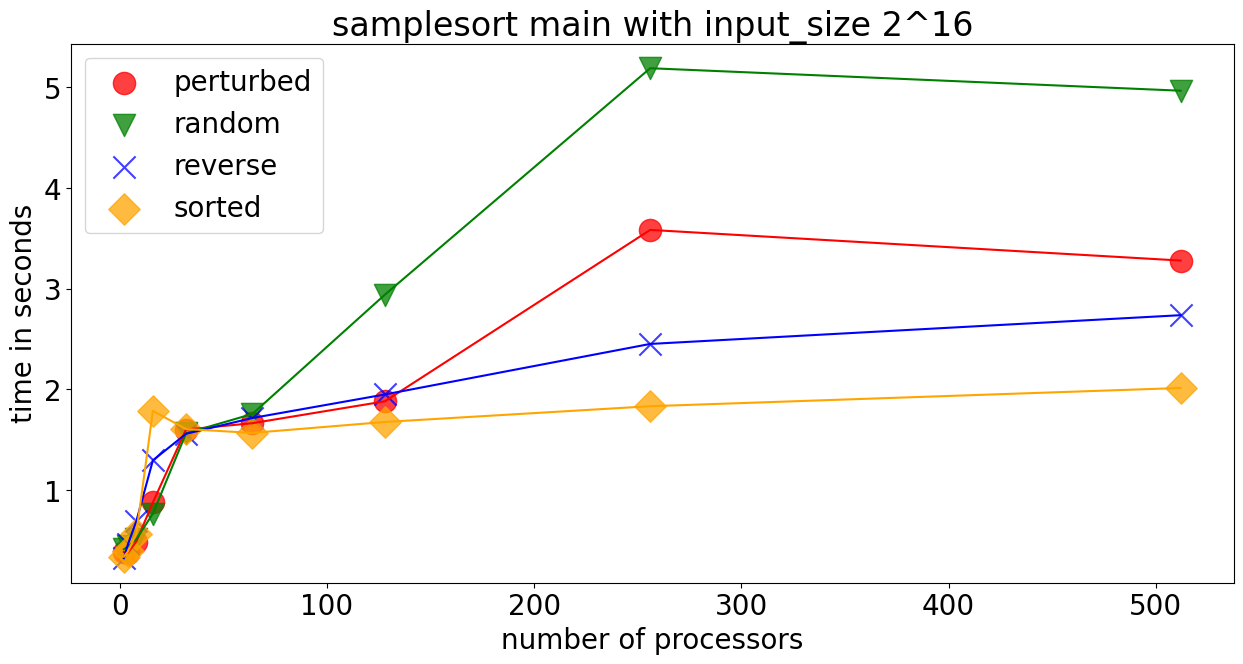

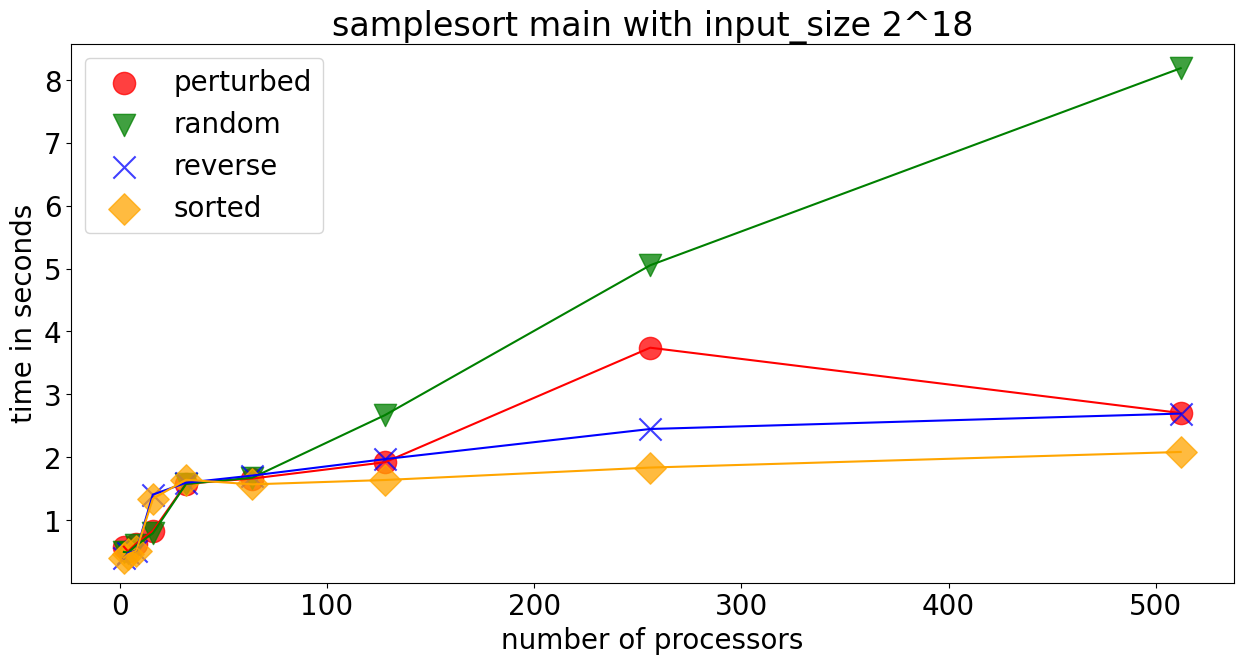

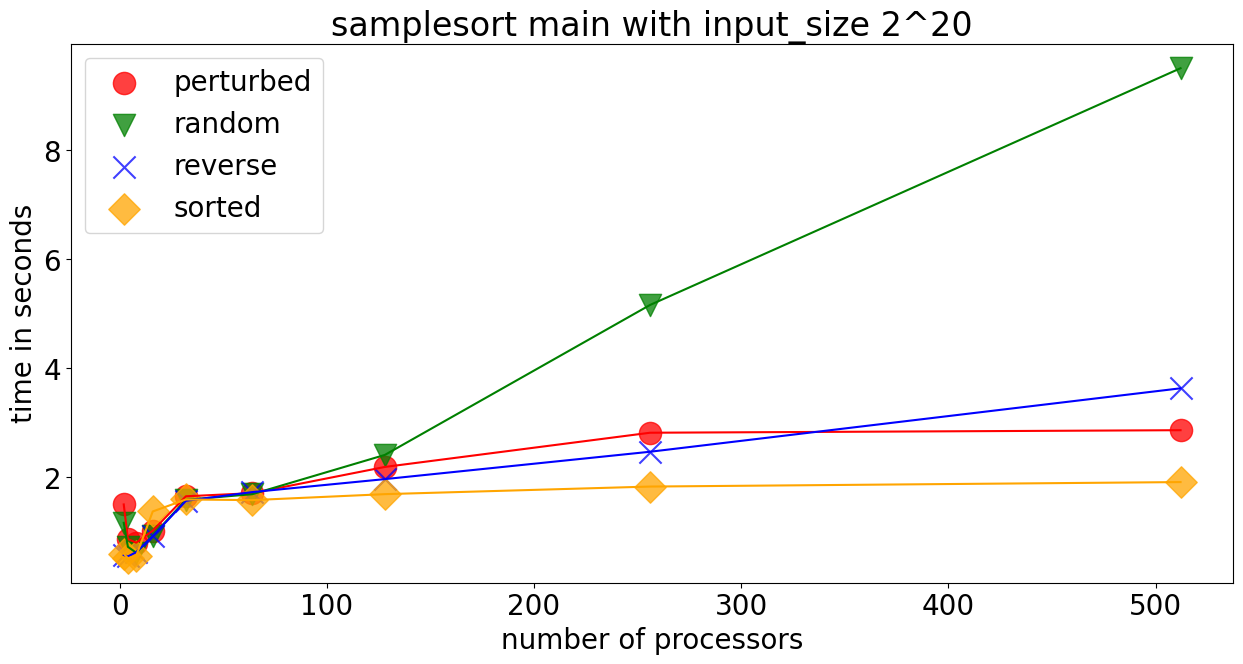

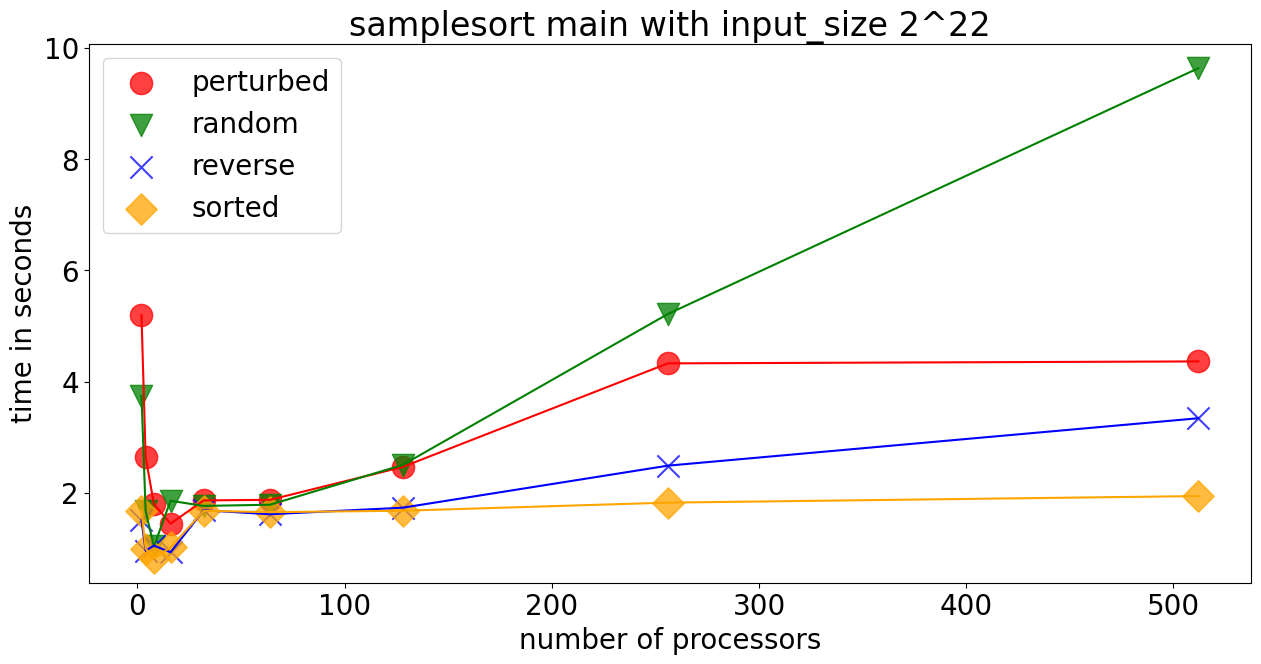

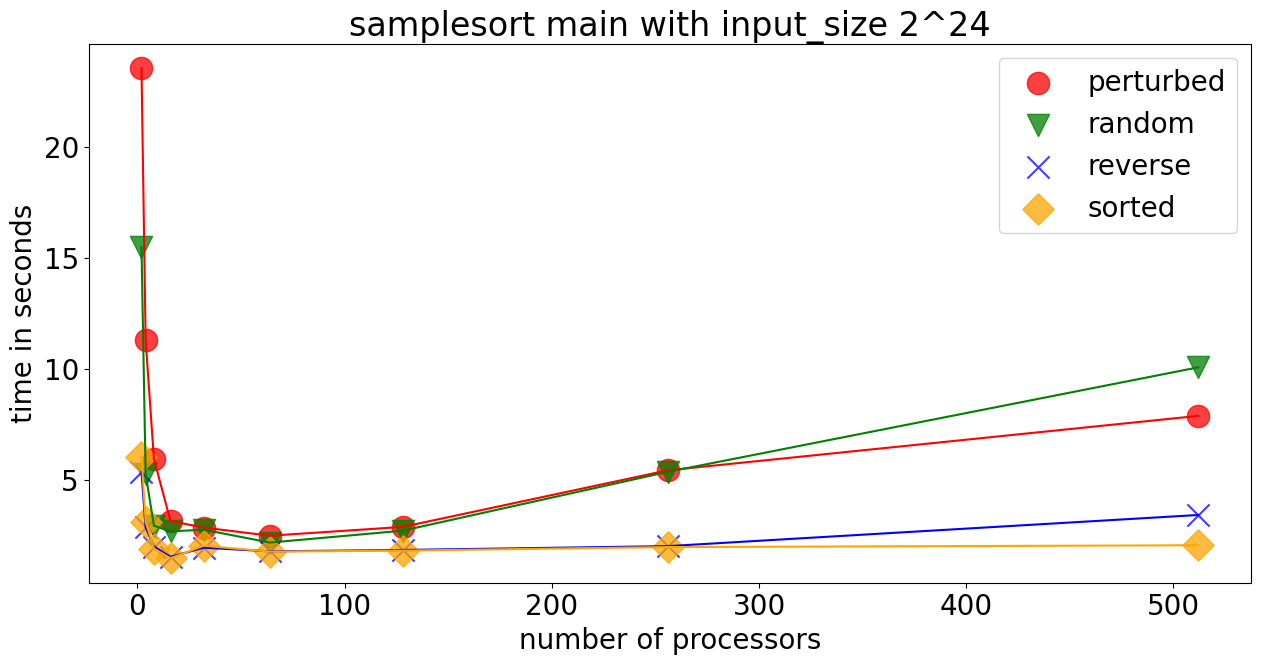

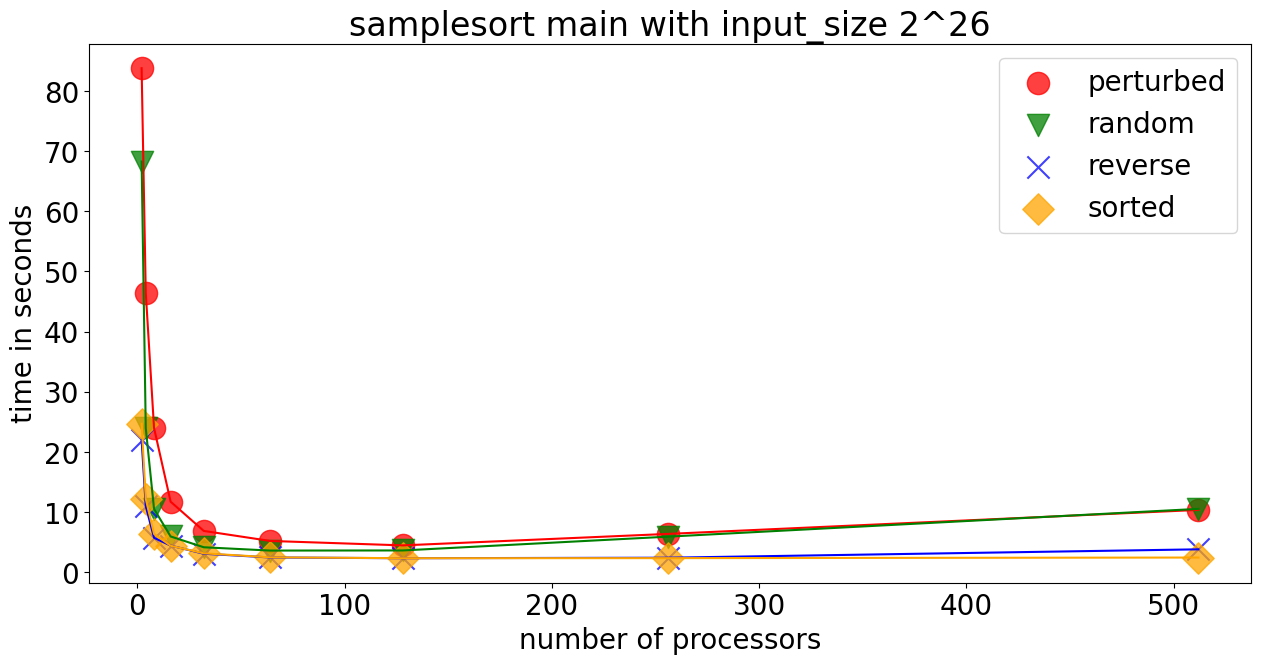

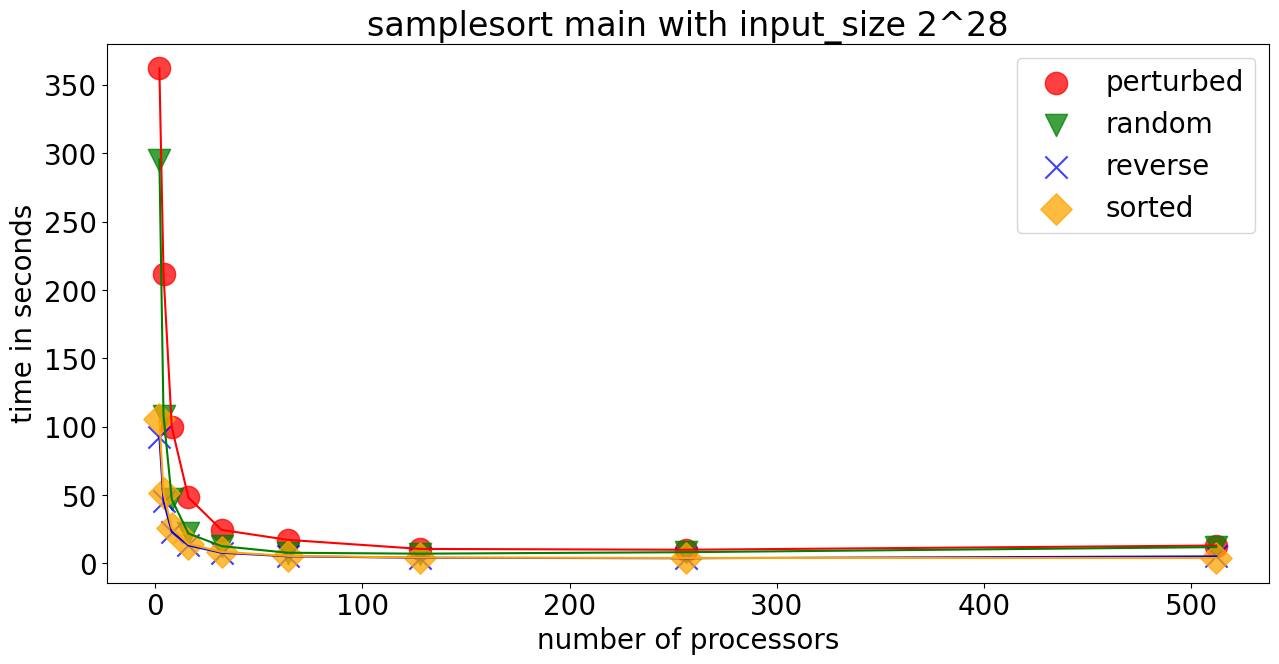

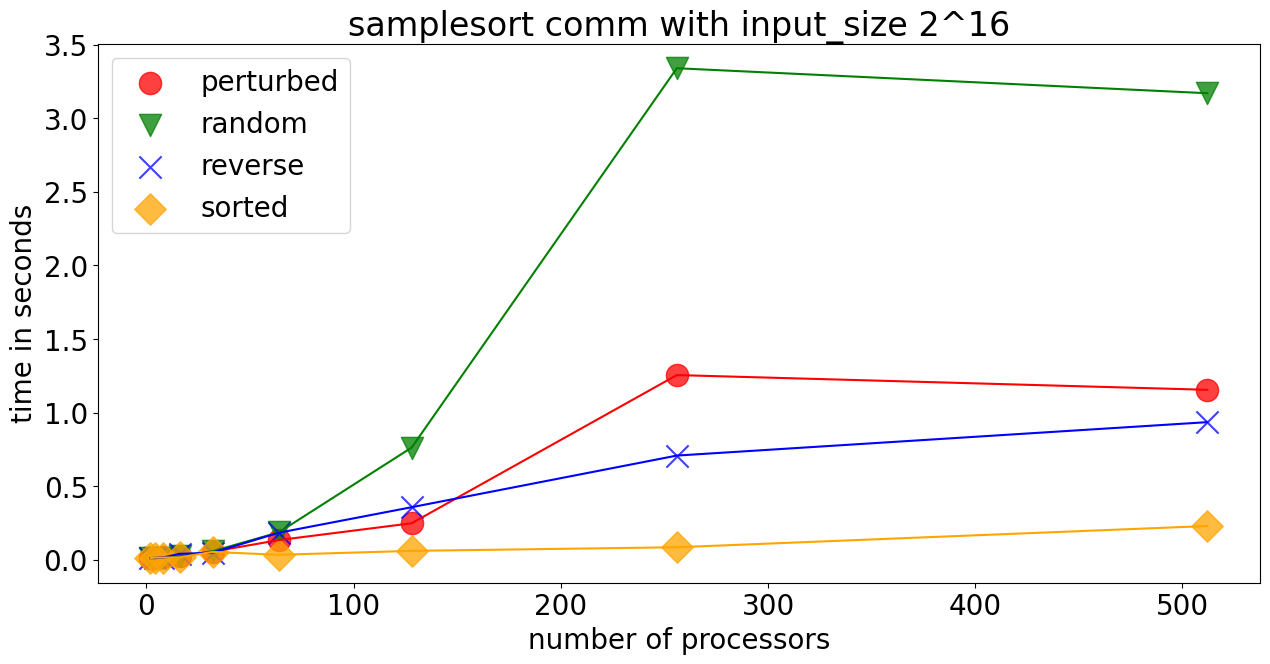

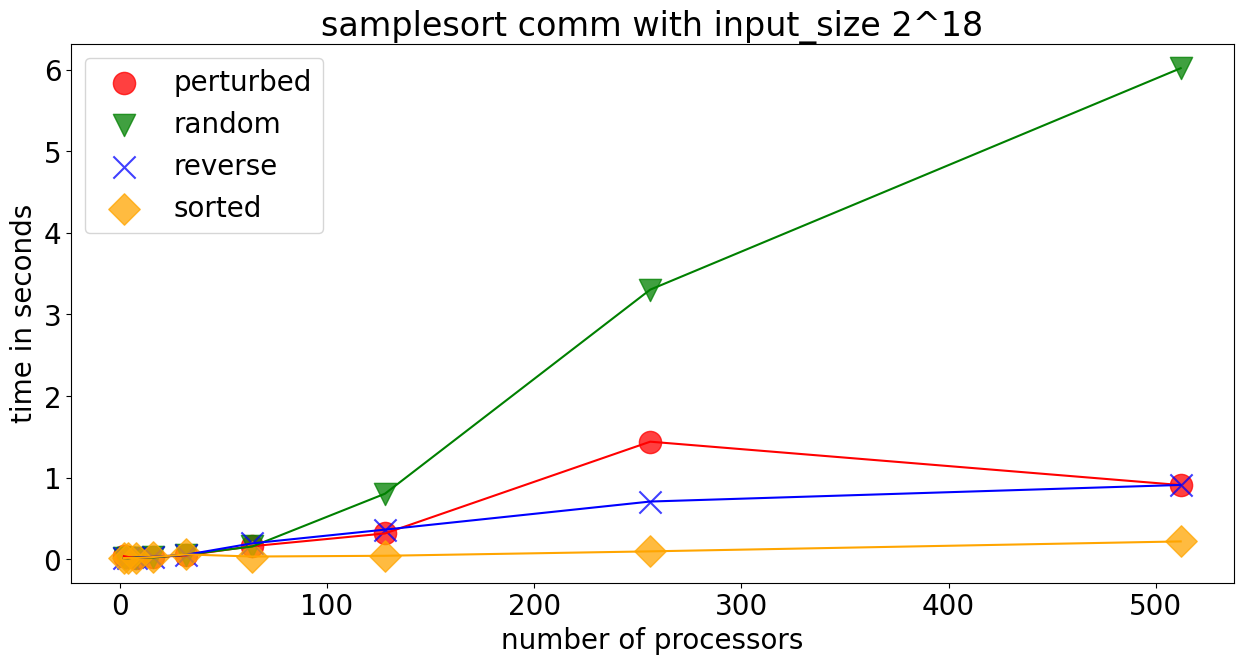

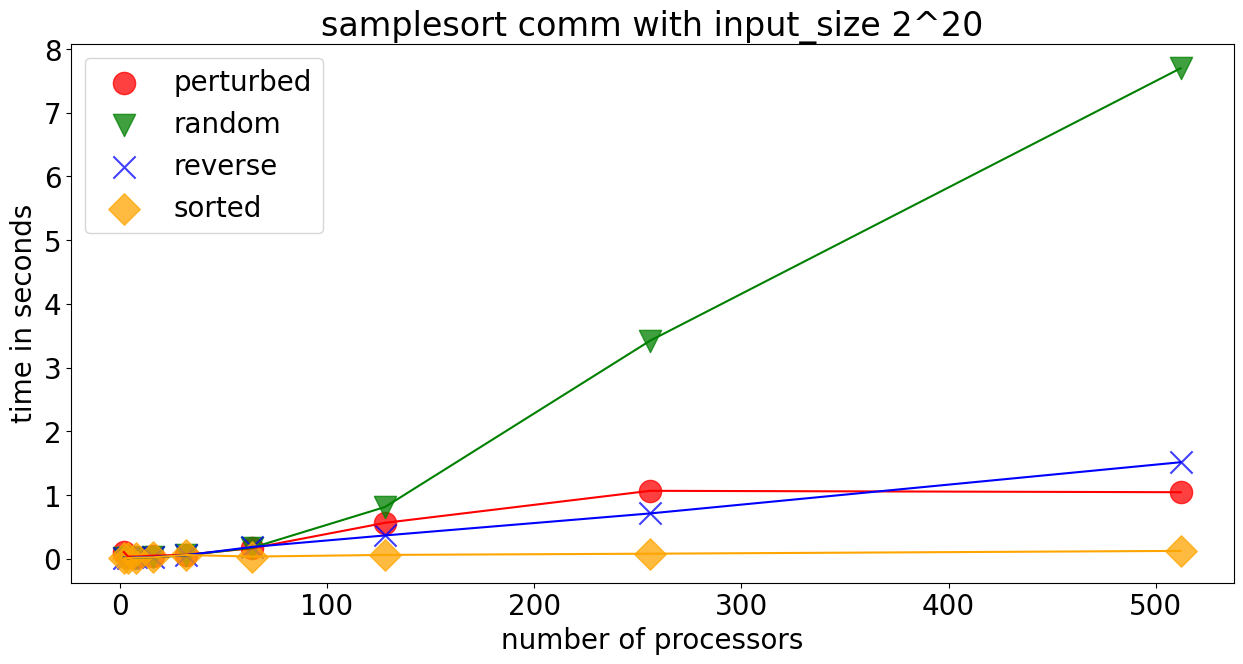

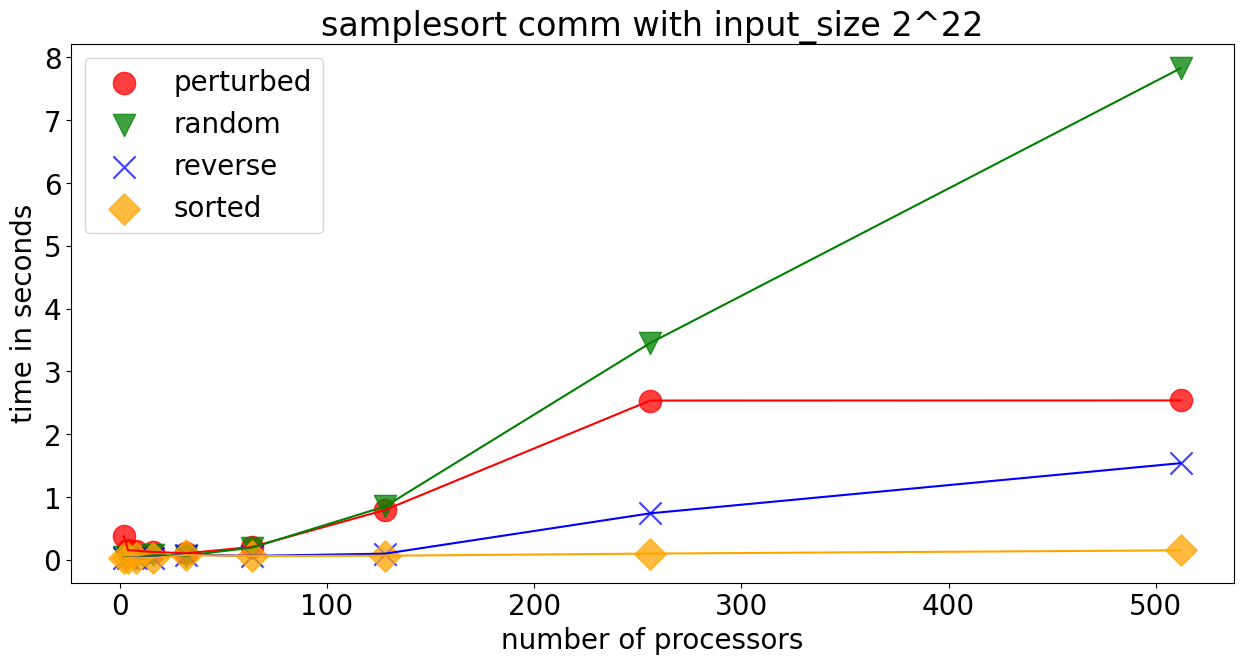

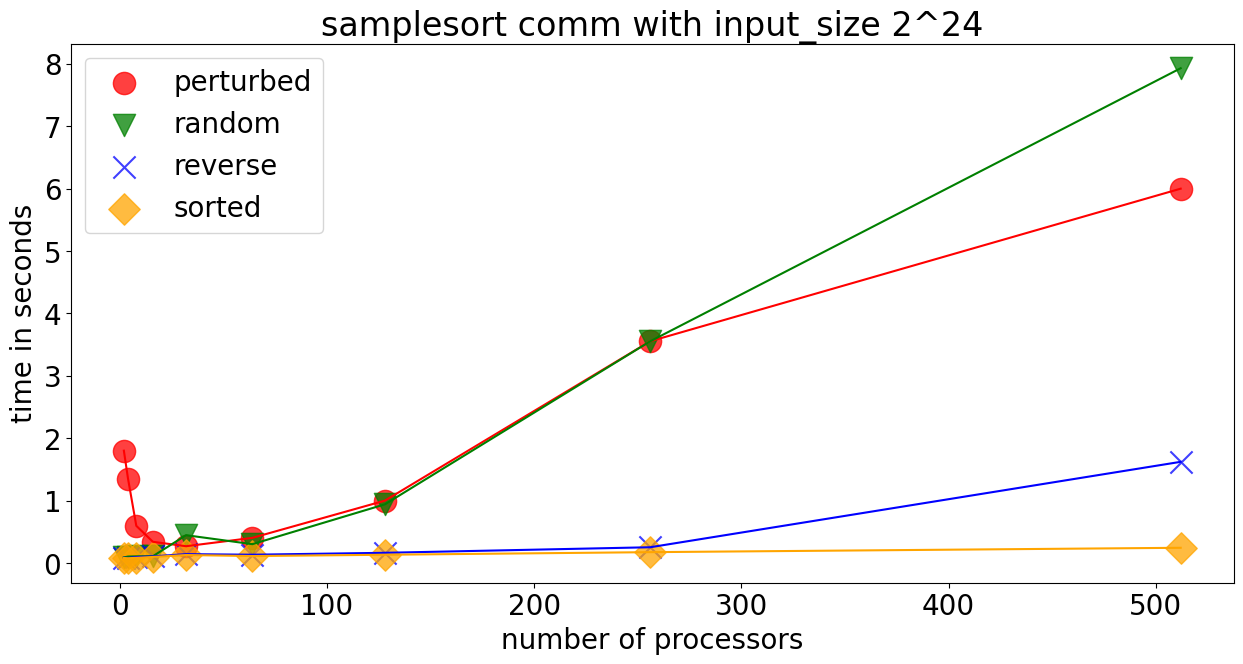

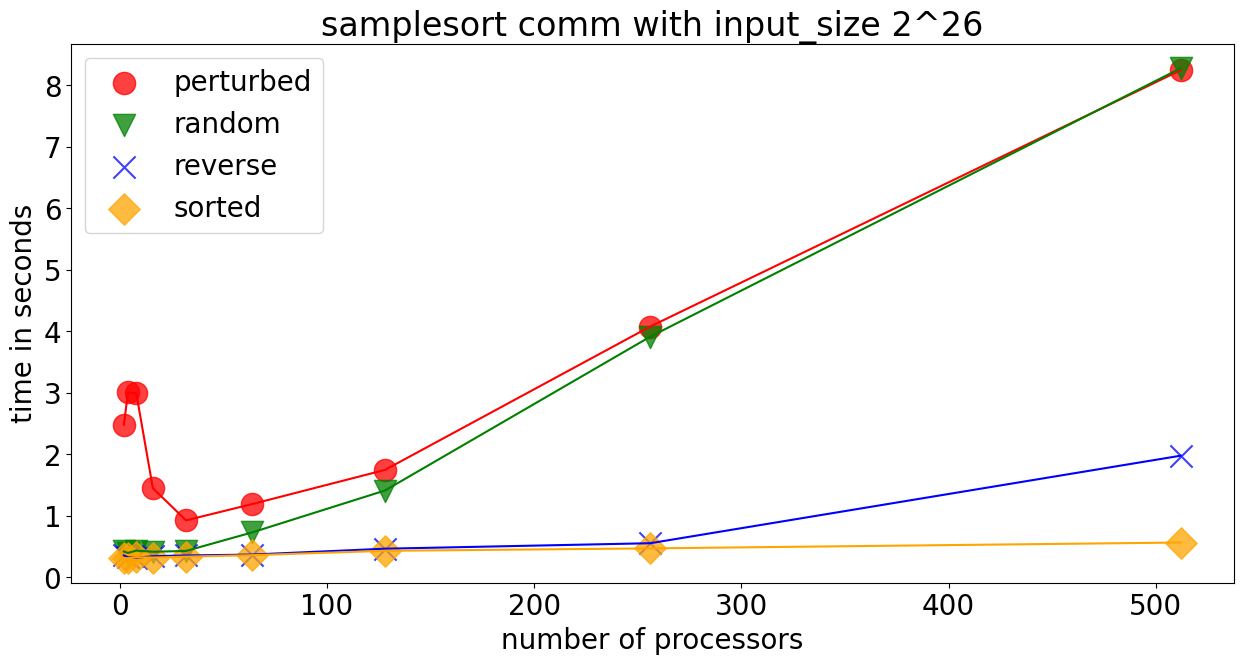

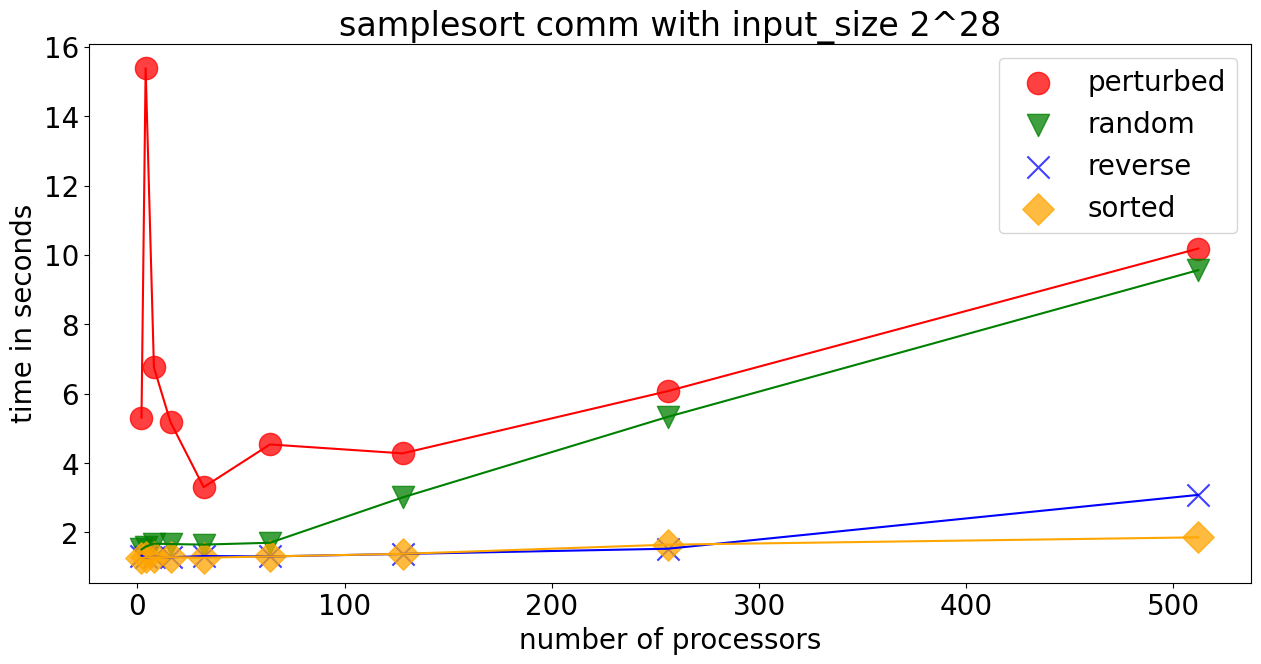

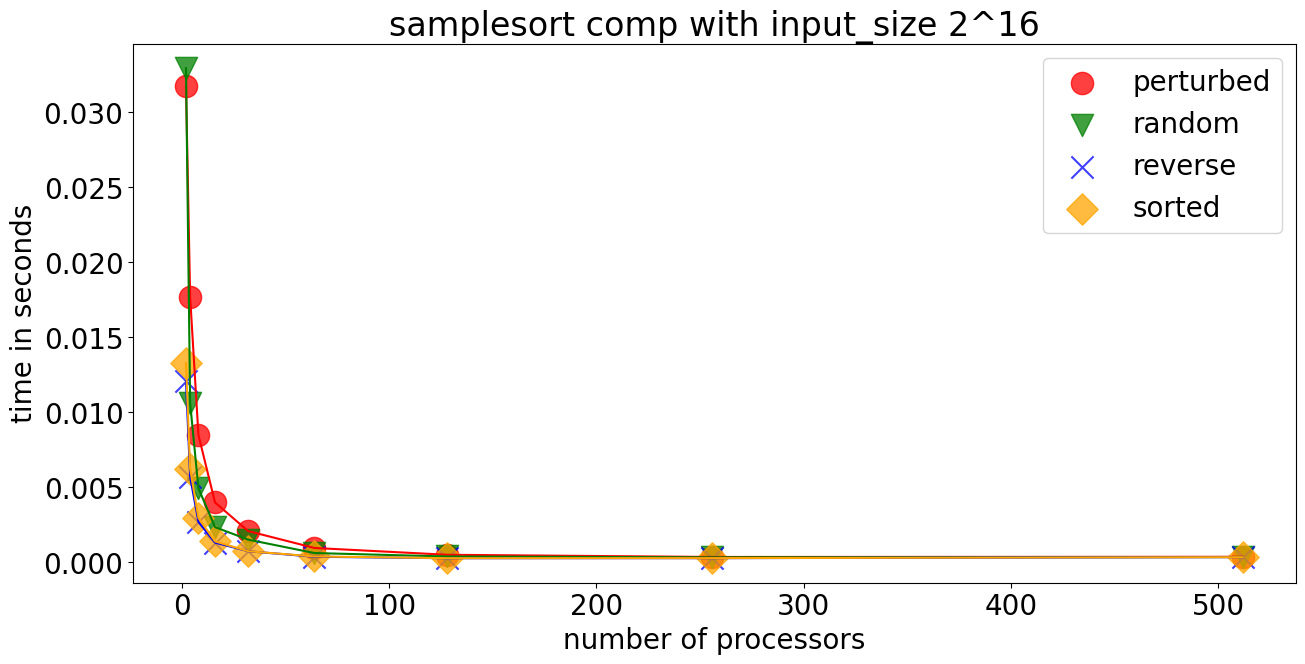

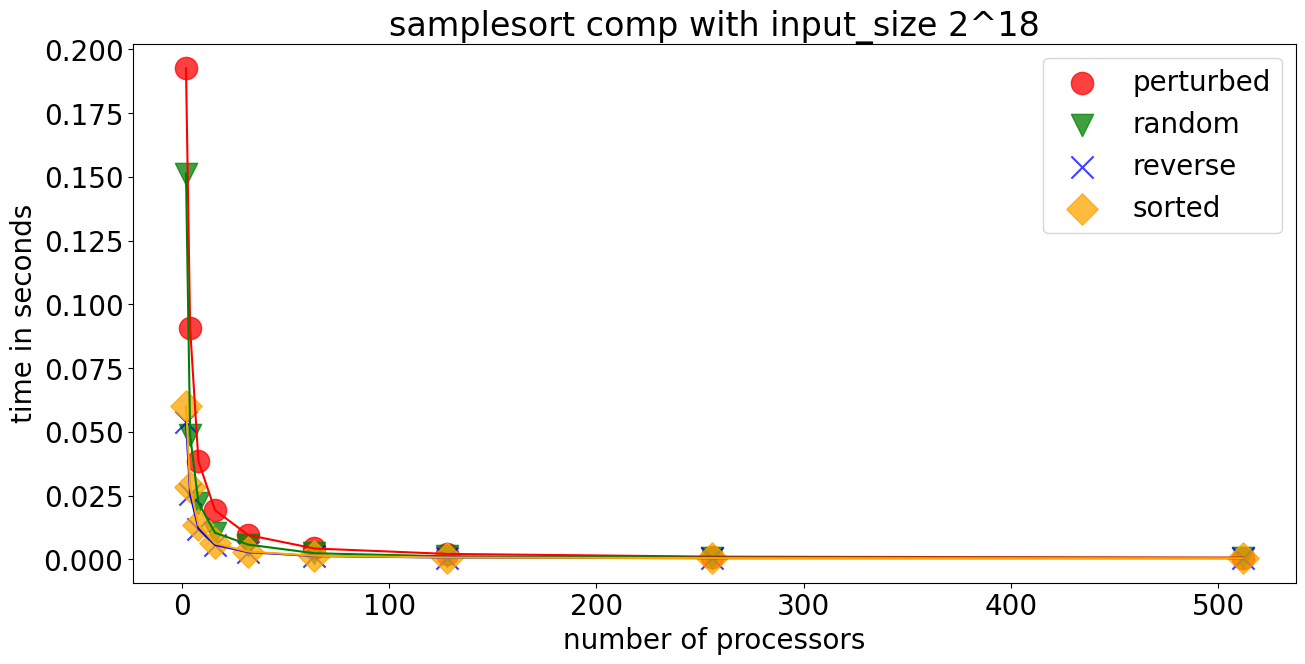

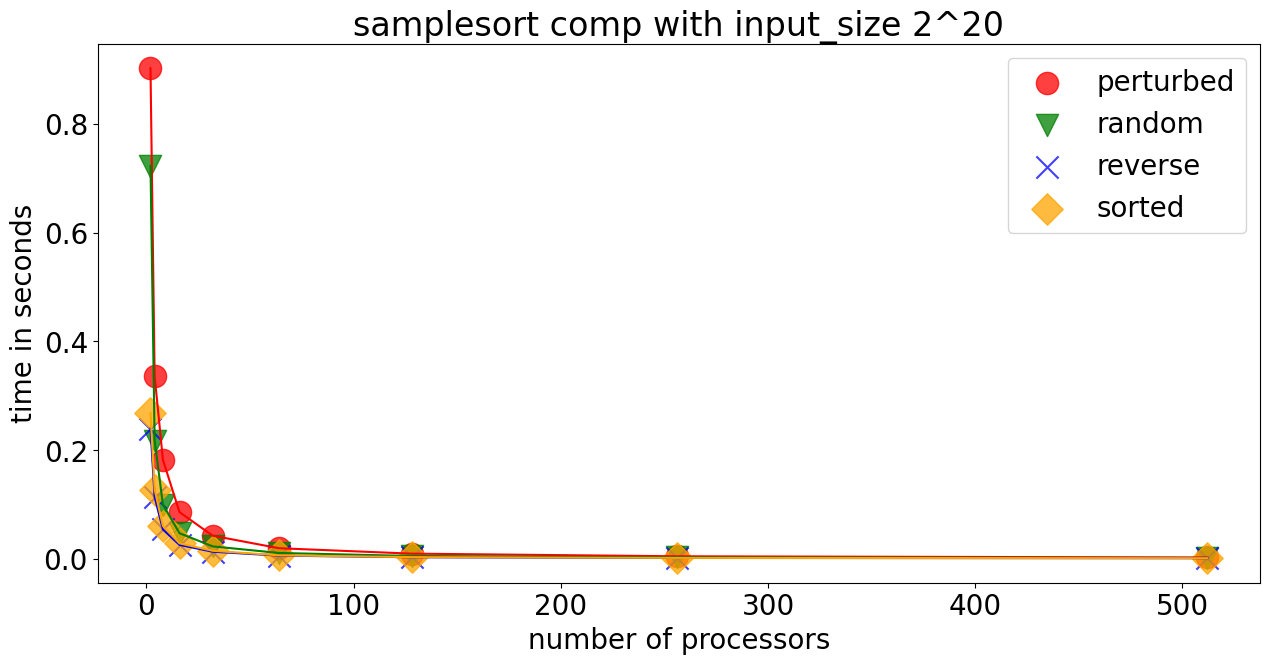

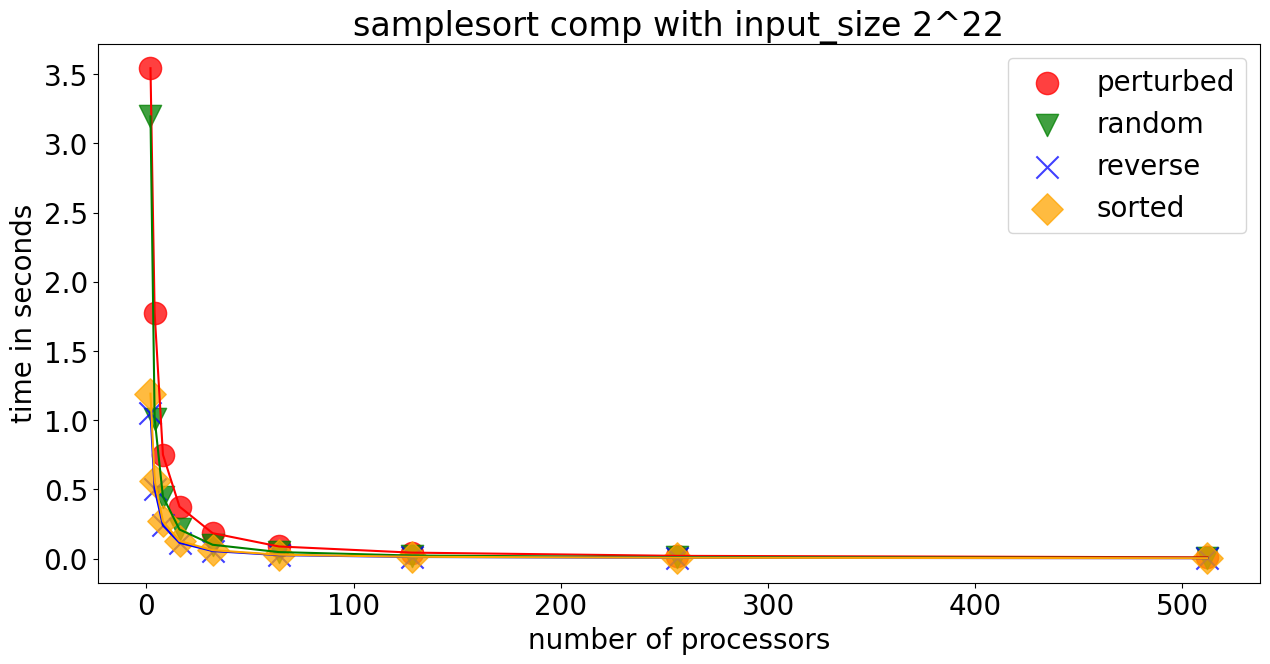

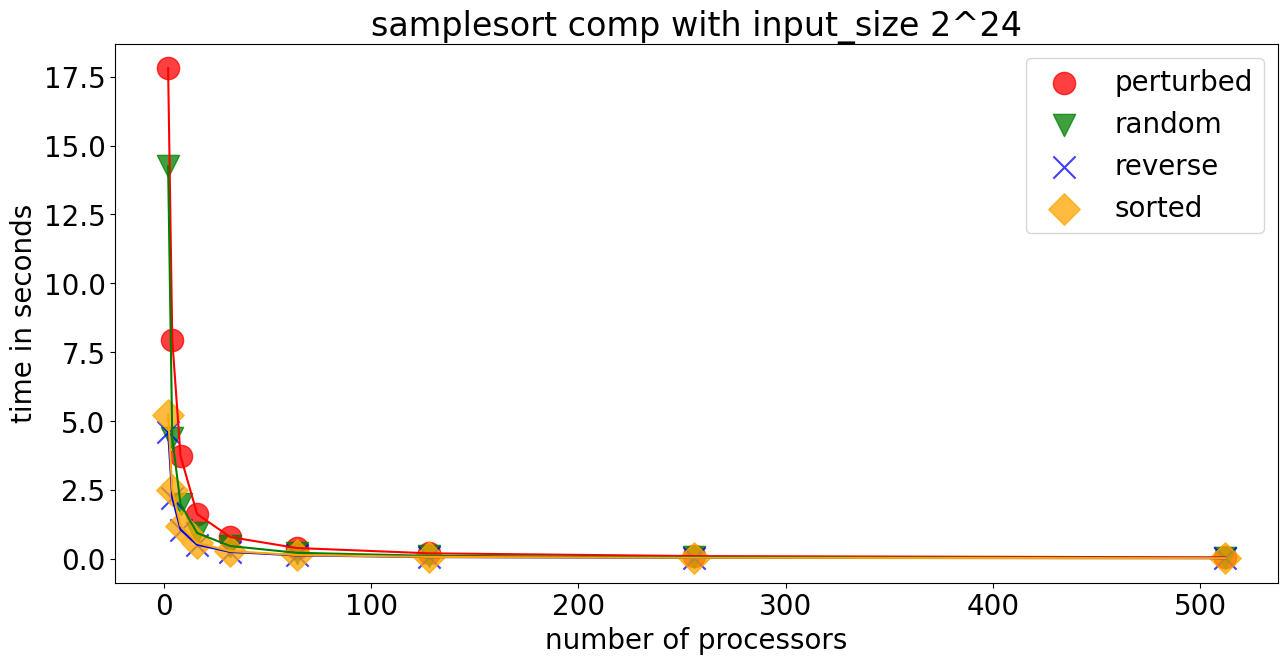

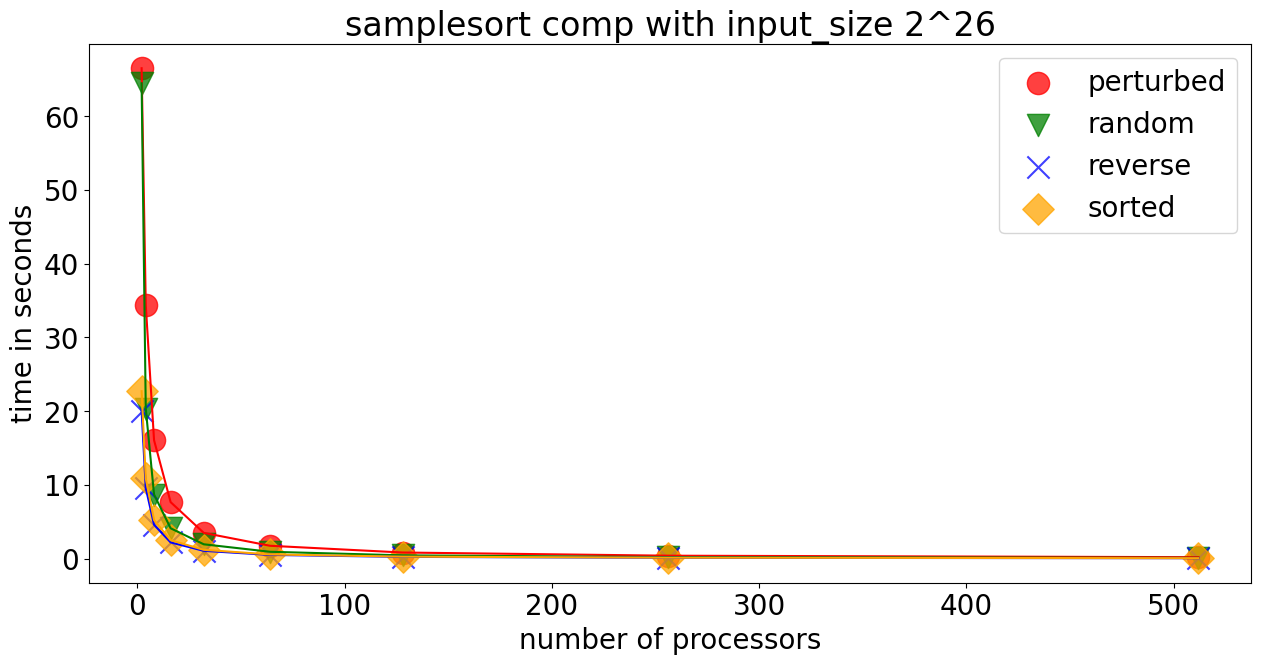

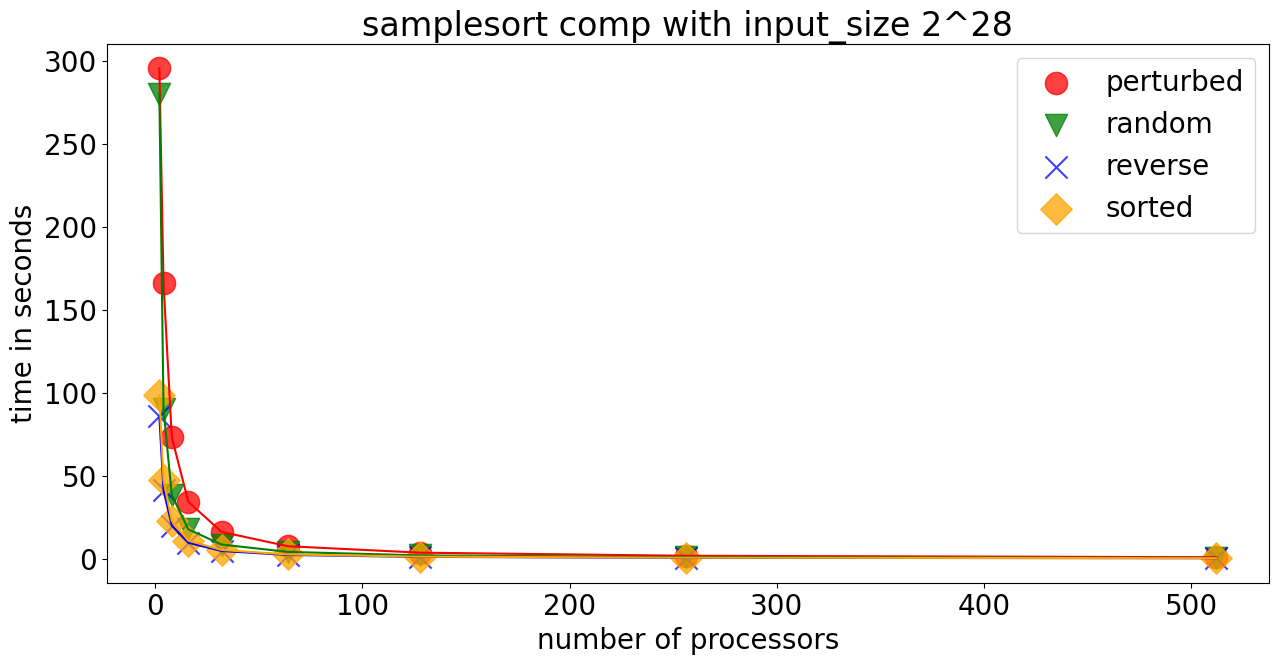

In [9]:
for node in tk.graph.traverse():
    node_name = node.frame["name"]
    if (node_name in ["main", "comm", "comp"]):
        input_size_frame = tk.dataframe.loc[node, "Avg time/rank"].unstack("input_size")
        for input_size in input_size_frame.keys():
            data_frame = input_size_frame[input_size].unstack(level="num_procs")
            plot_mpl(data_frame, 
                ["red", "green", "blue", "orange"], ['o', 'v', 'x', 'D'], 
                "samplesort {} with input_size 2^{}".format(node_name, int(math.log2(input_size))), "number of processors", "time in seconds",
                "../Plots/Samplesort_Plots/samplesort_{}_strong_{}.png".format(node_name, int(math.log2(input_size)))
            )